In [107]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-05-03 11:05:23,425: Credentials are already in use. The existing account in the session will be replaced.


In [108]:
from qiskit  import assemble
import numpy as np
import matplotlib.pyplot as plt

In [109]:
n=4
grover_ckt=QuantumCircuit(n+1,n)
marked=[1,0,1,1]#1101 marked =13

In [110]:
def apply_oracle(n,marked,ckt):
    controlO=[i for i in range(n) if not marked[i]]
    ckt.x(controlO)
    ckt.mct(list(range(n)),n)
    ckt.x(controlO)
    ckt.draw()

In [111]:
def reflect_uniform(ckt,n):
    ckt.h(list(range(n)))
    ckt.x(list(range(n)))
    ckt.mct(list(range(n)),n)
    ckt.x(list(range(n+1)))
    ckt.h(list(range(n)))
    

In [112]:
grover_ckt.x(n)
grover_ckt.barrier()
grover_ckt.h(list(range(n+1)))

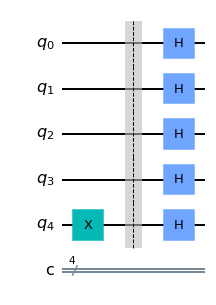

In [113]:
grover_ckt.draw()

In [114]:
svsim= Aer.get_backend('statevector_simulator')
qobj=assemble(grover_ckt)
result=svsim.run(qobj).result()
#statevector=result.data()["statevector"]
statevector=result.get_statevector()
statevector=np.array(statevector)
#statevector.dtype
statevector.shape
print(statevector)
statevector=statevector[:2**n]
statevector.shape
#print(np.array([i for i in range(2**n)]))
#statevector = statevector(dims=[i for i in range(2**n)])

[ 0.1767767-2.16489014e-17j  0.1767767-2.16489014e-17j
  0.1767767-2.16489014e-17j  0.1767767-2.16489014e-17j
  0.1767767-2.16489014e-17j  0.1767767-2.16489014e-17j
  0.1767767-2.16489014e-17j  0.1767767-2.16489014e-17j
  0.1767767-2.16489014e-17j  0.1767767-2.16489014e-17j
  0.1767767-2.16489014e-17j  0.1767767-2.16489014e-17j
  0.1767767-2.16489014e-17j  0.1767767-2.16489014e-17j
  0.1767767-2.16489014e-17j  0.1767767-2.16489014e-17j
 -0.1767767+2.16489014e-17j -0.1767767+2.16489014e-17j
 -0.1767767+2.16489014e-17j -0.1767767+2.16489014e-17j
 -0.1767767+2.16489014e-17j -0.1767767+2.16489014e-17j
 -0.1767767+2.16489014e-17j -0.1767767+2.16489014e-17j
 -0.1767767+2.16489014e-17j -0.1767767+2.16489014e-17j
 -0.1767767+2.16489014e-17j -0.1767767+2.16489014e-17j
 -0.1767767+2.16489014e-17j -0.1767767+2.16489014e-17j
 -0.1767767+2.16489014e-17j -0.1767767+2.16489014e-17j]


(16,)

In [115]:
marked=[1,0,1,1]
ket_a=np.zeros(2**n)
ket_a[13]=1
ket_e=(np.ones(2**n)-ket_a)/np.sqrt(2**n-1)

In [116]:
ket_a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [117]:
ket_e

array([0.25819889, 0.25819889, 0.25819889, 0.25819889, 0.25819889,
       0.25819889, 0.25819889, 0.25819889, 0.25819889, 0.25819889,
       0.25819889, 0.25819889, 0.25819889, 0.        , 0.25819889,
       0.25819889])

In [118]:
def get_projection(psi,e,a):
    proj=[np.real(np.vdot(e,psi)),np.real(np.vdot(a,psi))]
    return proj
def plt_vector(proj,axes=[0.0,1.0,0.0,1.0]):
    x_pos=0
    y_pos=0
    x_direct=proj[0]
    y_direct=proj[1]
    fig,ax =plt.subplots()
    ax.quiver(x_pos,y_pos,x_direct,y_direct,scale=1.0)
    ax.axis(axes) 
    plt.show()
              
              
              
              
        
    

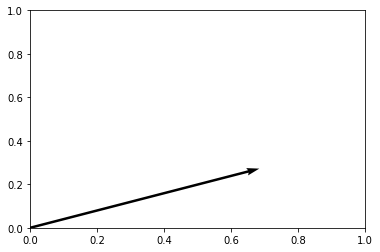

In [119]:
proj =get_projection(statevector,ket_e,ket_a)
plt_vector(proj)

In [120]:
apply_oracle(4,marked,grover_ckt)
grover_ckt.barrier()

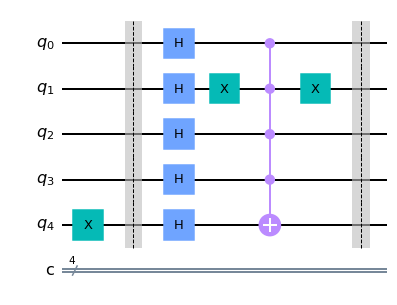

In [121]:
grover_ckt.draw()

In [122]:
reflect_uniform(grover_ckt,n)

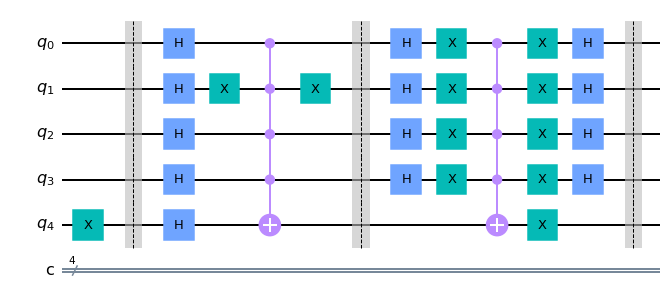

In [123]:
grover_ckt.barrier()
grover_ckt.draw()

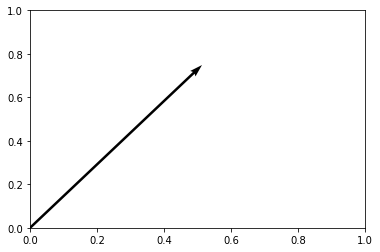

In [124]:
svsim= Aer.get_backend('statevector_simulator')
qobj=assemble(grover_ckt)
result=svsim.run(qobj).result()
#statevector=result.data()["statevector"]
statevector=result.get_statevector()
statevector=np.array(statevector)
statevector=statevector[:2**n]
proj =get_projection(statevector,ket_e,ket_a)
plt_vector(proj)

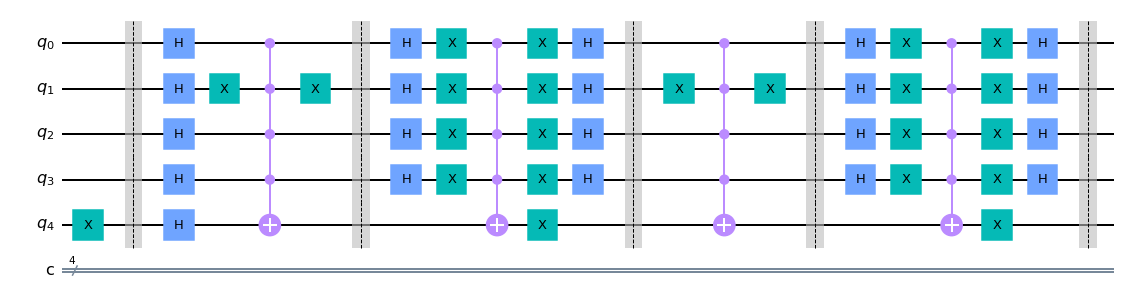

In [125]:
apply_oracle(4,marked,grover_ckt)
grover_ckt.barrier()
reflect_uniform(grover_ckt,n)
grover_ckt.barrier()
grover_ckt.draw()

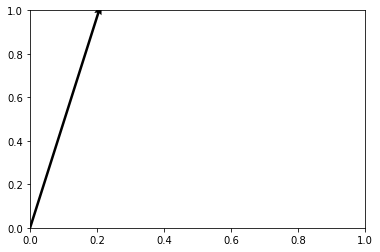

In [126]:
svsim= Aer.get_backend('statevector_simulator')
qobj=assemble(grover_ckt)
result=svsim.run(qobj).result()
#statevector=result.data()["statevector"]
statevector=result.get_statevector()
statevector=np.array(statevector)
statevector=statevector[:2**n]
proj =get_projection(statevector,ket_e,ket_a)
plt_vector(proj)

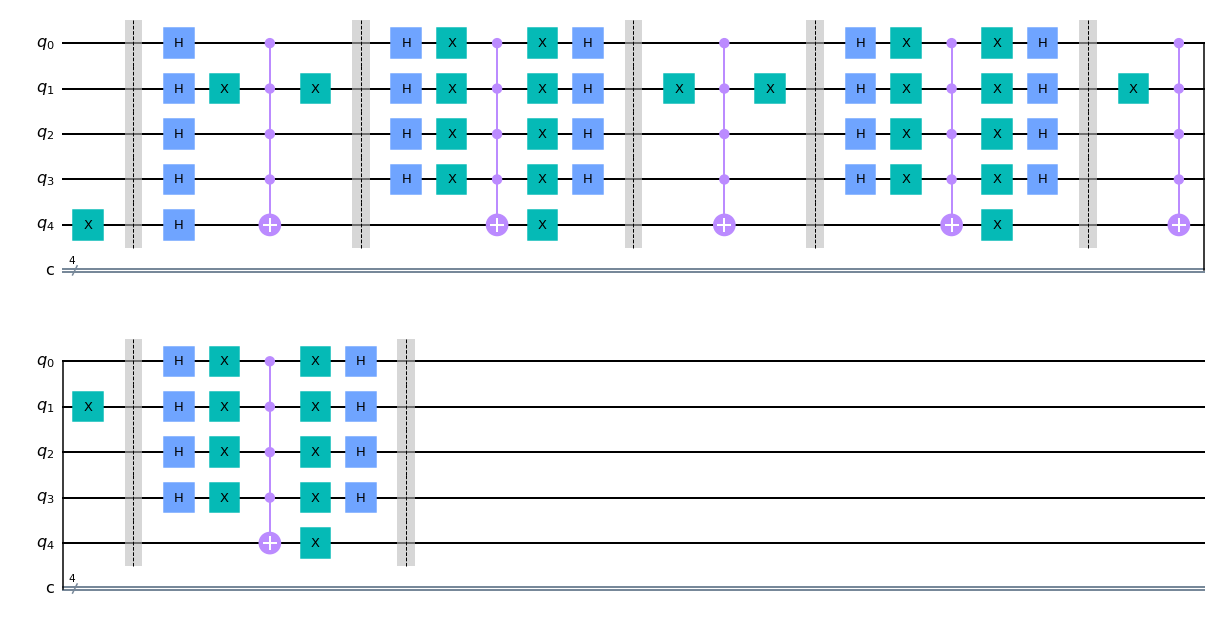

In [127]:
apply_oracle(4,marked,grover_ckt)
grover_ckt.barrier()
reflect_uniform(grover_ckt,n)
grover_ckt.barrier()
grover_ckt.draw()

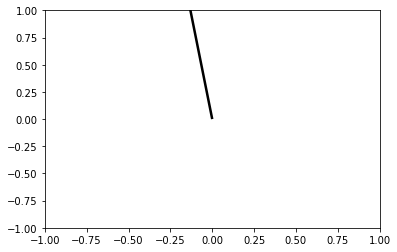

In [130]:
svsim= Aer.get_backend('statevector_simulator')
qobj=assemble(grover_ckt)
result=svsim.run(qobj).result()
#statevector=result.data()["statevector"]
statevector=result.get_statevector()
statevector=np.array(statevector)
statevector=statevector[:2**n]
proj =get_projection(statevector,ket_e,ket_a)
plt_vector(proj,axes=[-1.0,1.0,-1.0,1.0])

In [132]:
import math
thetaO=math.asin(1/math.sqrt(2**n))
print(thetaO)

0.25268025514207865


In [141]:
T=0
angle=thetaO
print(angle)
while(angle+(2*thetaO)<=(math.pi/2)and angle>=0):
    T+=1
    angle=angle+(2*thetaO)
    print(angle)
   
#print(T)
    

0.25268025514207865
0.758040765426236
1.2634012757103932
2


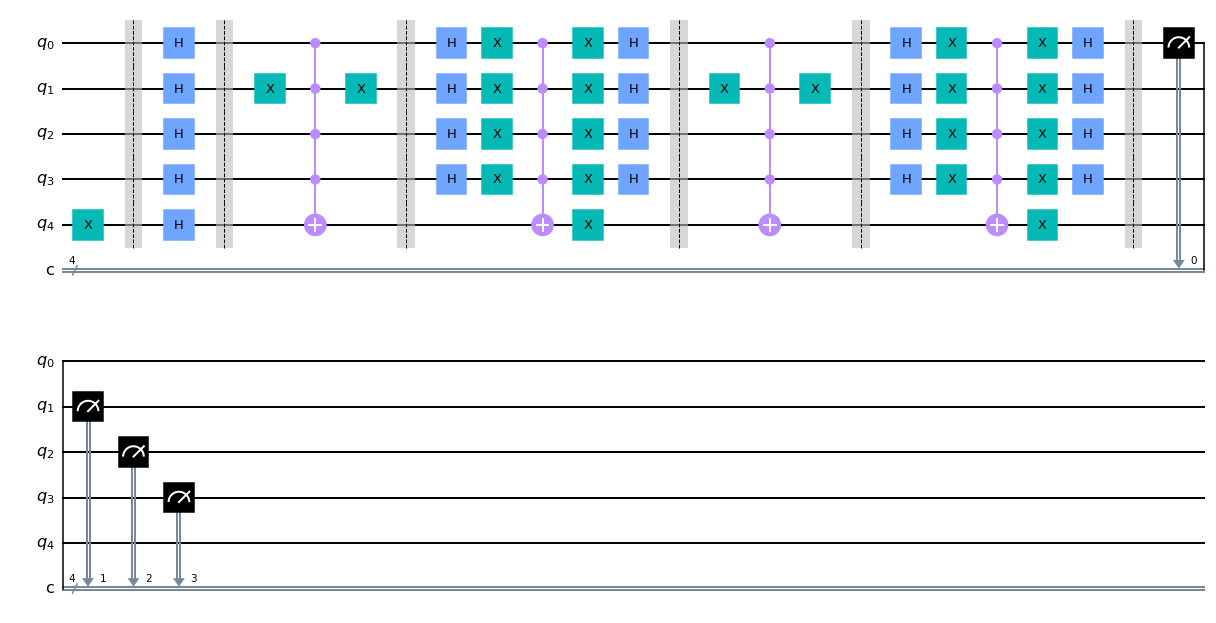

In [142]:
n=4
grover_ckt=QuantumCircuit(n+1,n)
marked=[1,0,1,1]#1101 marked =13
grover_ckt.x(n)
grover_ckt.barrier()
grover_ckt.h(list(range(n+1)))
grover_ckt.barrier()
for _ in range(int(np.floor(T))):
    apply_oracle(4,marked,grover_ckt)
    grover_ckt.barrier()
    reflect_uniform(grover_ckt,n)
    grover_ckt.barrier()
for j in range(n):
    grover_ckt.measure(j,j)
grover_ckt.draw()

In [144]:
sim=Aer.get_backend("qasm_simulator")
qobj=assemble(grover_ckt)
result=sim.run(qobj).result()
result

Result(backend_name='qasm_simulator', backend_version='0.10.3', qobj_id='94e1a789-42a3-409d-b17a-f74b017faff5', job_id='acc4d1da-816d-4e13-8fad-497eb07d061a', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 5, '0xe': 3, '0xf': 5, '0xa': 9, '0x9': 10, '0xb': 6, '0x4': 6, '0x6': 9, '0x8': 9, '0xd': 928, '0x2': 7, '0x5': 5, '0xc': 7, '0x3': 8, '0x0': 4, '0x7': 3}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2], ['c', 3]], creg_sizes=[['c', 4]], global_phase=0.0, memory_slots=4, metadata=None, n_qubits=5, name='circuit-7', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=DONE, seed_simulator=112514220, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 5, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'statevector', 'active_input_qubits': [

In [145]:
counts=result.get_counts(grover_ckt)

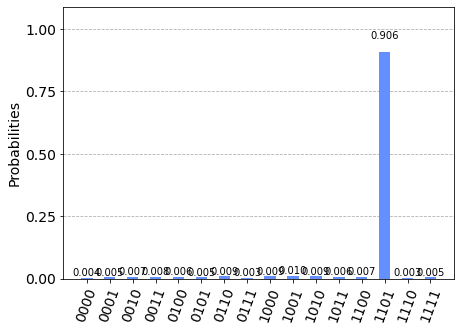

In [146]:
plot_histogram(counts)